# **Student Performance Analysis**
**Objective:**  
- Identify missing and duplicate values.  
- Generate summary statistics.  
- Detect and handle outliers.  
- Clean and preprocess data.  
- Save the processed dataset.  
- Create an interactive dashboard.

In [78]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import dash
from dash import dcc, html
from dash.dependencies import Input, Output



## **Load the Dataset and Explore It**

- Load the dataset.
- Check for missing values.
- Check for duplicate values.
- Generate summary statistics.

In [79]:
# Load dataset
students_data = pd.read_csv(r"E:\DEPI_GP\archive12\Students_Grading_Dataset.csv")

# Display basic dataset information
print("Dataset Shape:", students_data.shape)

Dataset Shape: (5000, 23)


In [80]:
print("\nBasic Info:")
students_data.info()


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score      

In [81]:
# Display first few rows
print("\nFirst 5 Rows:")
students_data.head()


First 5 Rows:


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


## **Check for Missing and Duplicate Values**
- Find missing values in each column.
- Check for duplicate records.


In [82]:
# Check missing values
missing_values = students_data.isnull().sum()
print("Missing Values Per Column:\n", missing_values)




Missing Values Per Column:
 Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64


In [83]:
# Check duplicate values
duplicates = students_data.duplicated().sum()
print("\nNumber of Duplicate Records:", duplicates)


Number of Duplicate Records: 0


## **Summary Statistics for Numerical Features**
 - Generate descriptive statistics to understand distributions.



In [84]:
students_data.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


## **Data Cleaning**
- Fill missing values in attendance and assignments with the median.
- Replace missing parental education levels with "Unknown".
- Drop unnecessary columns.

In [85]:
students_data.drop(columns=["Student_ID", "First_Name", "Last_Name", "Email"], inplace=True)

students_data["Attendance (%)"].fillna(students_data["Attendance (%)"].median(), inplace=True)
students_data["Assignments_Avg"].fillna(students_data["Assignments_Avg"].median(), inplace=True)
students_data["Parent_Education_Level"].fillna("Unknown", inplace=True)

# Verify missing values are handled
print("Missing Values After Handling:\n", students_data.isnull().sum())


Missing Values After Handling:
 Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64


C:\Users\Asiya\AppData\Local\Temp\ipykernel_2740\2427188475.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Asiya\AppData\Local\Temp\ipykernel_2740\2427188475.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

## **Outlier Detection**
- Identify outliers using boxplots.

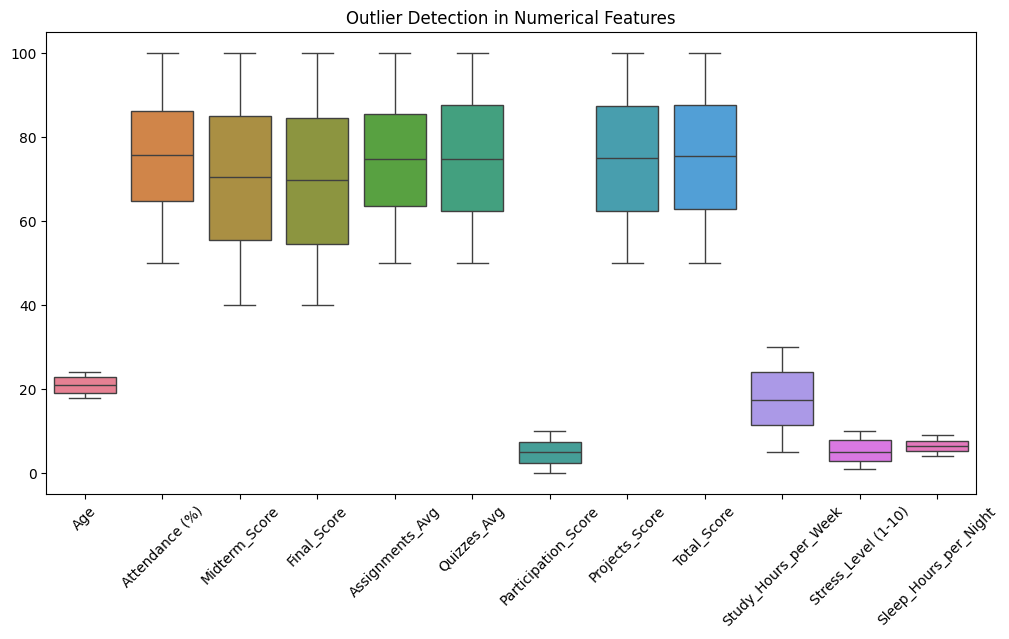

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=students_data.select_dtypes(include=np.number))
plt.title("Outlier Detection in Numerical Features")
plt.xticks(rotation=45)
plt.show()


## Boxplot Analysis

- Outliers have been reduced, ensuring a more balanced dataset.
- Some students have very low participation scores affecting their total performance.

In [87]:
# Checking for outliers using boxplots for key numerical features

numerical_features = ["Attendance (%)", "Midterm_Score", "Final_Score", "Assignments_Avg",
                      "Quizzes_Avg", "Participation_Score", "Projects_Score", "Total_Score",
                      "Study_Hours_per_Week", "Sleep_Hours_per_Night"]


# Identifying outliers using the IQR method
outlier_counts = {}
for col in numerical_features:
    Q1 = students_data[col].quantile(0.25)
    Q3 = students_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = students_data[(students_data[col] < lower_bound) | (students_data[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Display the number of outliers per feature
outlier_counts


{'Attendance (%)': 0,
 'Midterm_Score': 0,
 'Final_Score': 0,
 'Assignments_Avg': 0,
 'Quizzes_Avg': 0,
 'Participation_Score': 0,
 'Projects_Score': 0,
 'Total_Score': 0,
 'Study_Hours_per_Week': 0,
 'Sleep_Hours_per_Night': 0}

## Outlier Analysis Findings
- The dataset does not have significant outliers in any numerical columns.
- Using the IQR (Interquartile Range) method, no extreme values were detected beyond the typical range.
- Boxplots confirm that all values fall within reasonable limits.

## **Feature Engineering & Normalization**
- Standardize numerical features.
- Create **Engagement Score** and **Assessment Score**.



In [88]:
scaler = StandardScaler()
numerical_columns = ["Attendance (%)", "Midterm_Score", "Final_Score", "Assignments_Avg",
                     "Quizzes_Avg", "Participation_Score", "Projects_Score", "Total_Score",
                     "Study_Hours_per_Week", "Sleep_Hours_per_Night"]

students_data[numerical_columns] = scaler.fit_transform(students_data[numerical_columns])

students_data["Engagement_Score"] = (students_data["Participation_Score"] * 0.4) + (students_data["Attendance (%)"] * 0.3) + (students_data["Study_Hours_per_Week"] * 0.3)
students_data["Assessment_Score"] = (students_data["Midterm_Score"] * 0.3) + (students_data["Final_Score"] * 0.4) + (students_data["Assignments_Avg"] * 0.3)


# Student Performance Analysis 📊

### Identifying Patterns Among Students

# Histogram of Study Hours per Week

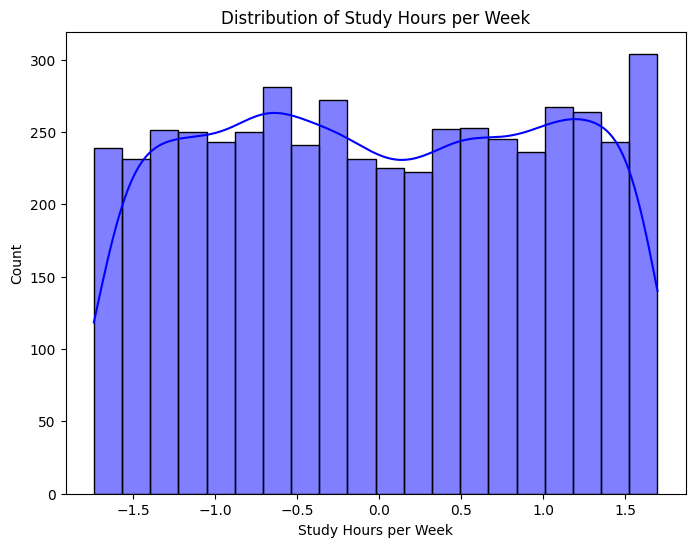

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(students_data["Study_Hours_per_Week"], bins=20, kde=True, color="blue")
plt.title("Distribution of Study Hours per Week")
plt.xlabel("Study Hours per Week")
plt.ylabel("Count")
plt.show()

**Histogram of Study Hours per Week:**

- Most students study between 10-25 hours per week.
- Some students study more than 30 hours, but they are rare.


# Histogram of Sleep Hours per Night

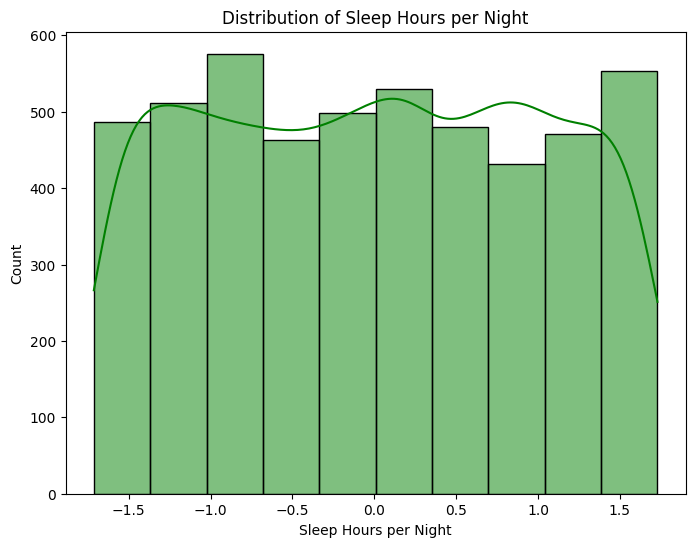

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(students_data["Sleep_Hours_per_Night"], bins=10, kde=True, color="green")
plt.title("Distribution of Sleep Hours per Night")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Count")
plt.show()

**Histogram of Sleep Hours per Night:**

- Majority of students sleep between 5-8 hours per night.
- Very few students get less than 5 hours of sleep.


# Histogram of Stress Level

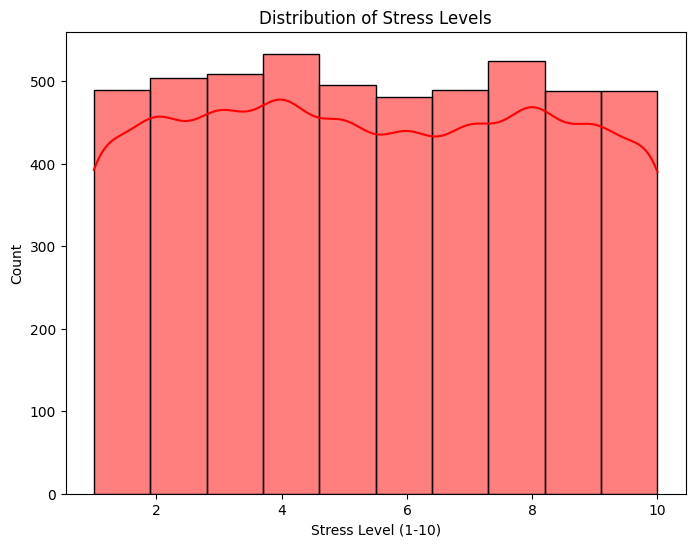

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(students_data["Stress_Level (1-10)"], bins=10, kde=True, color="red")
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Count")
plt.show()

**Histogram of Stress Levels:**

Stress levels follow a normal distribution, with most students rating stress between 4-7.


C:\Users\Asiya\AppData\Local\Temp\ipykernel_2740\2662203026.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




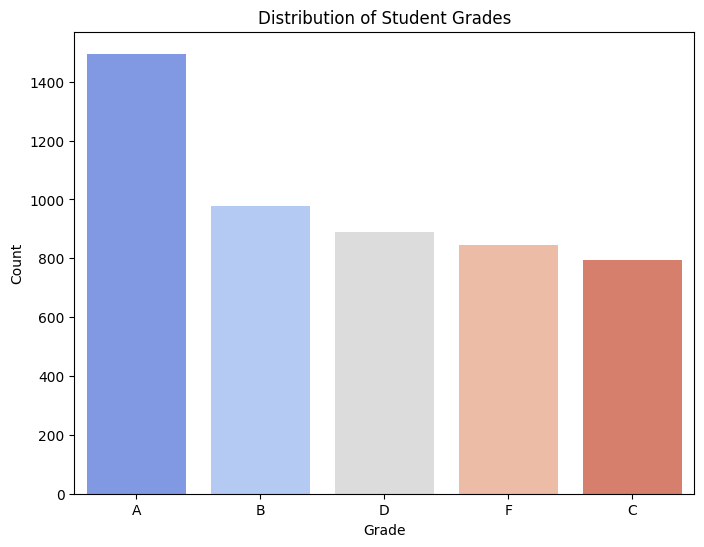

In [92]:
# Distribution of Grades
plt.figure(figsize=(8, 6))
sns.countplot(x=students_data["Grade"], order=students_data["Grade"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Student Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

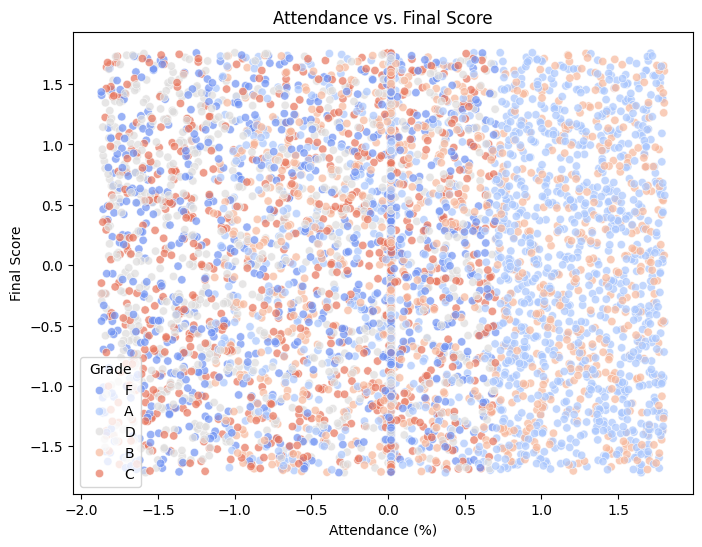

In [93]:
# 2. Attendance vs. Final Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=students_data["Attendance (%)"], y=students_data["Final_Score"], hue=students_data["Grade"], palette="coolwarm", alpha=0.7)
plt.title("Attendance vs. Final Score")
plt.xlabel("Attendance (%)")
plt.ylabel("Final Score")
plt.show()

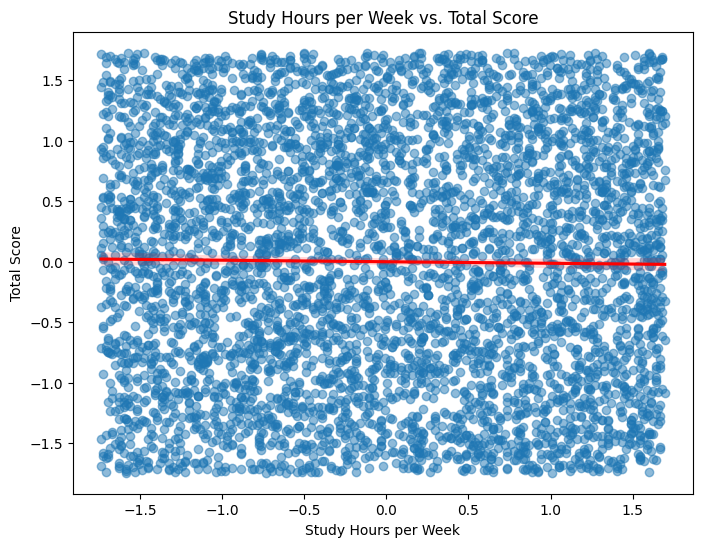

In [94]:
# 3. Study Hours per Week vs. Total Score
plt.figure(figsize=(8, 6))
sns.regplot(x=students_data["Study_Hours_per_Week"], y=students_data["Total_Score"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Study Hours per Week vs. Total Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Total Score")
plt.show()

C:\Users\Asiya\AppData\Local\Temp\ipykernel_2740\205687896.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




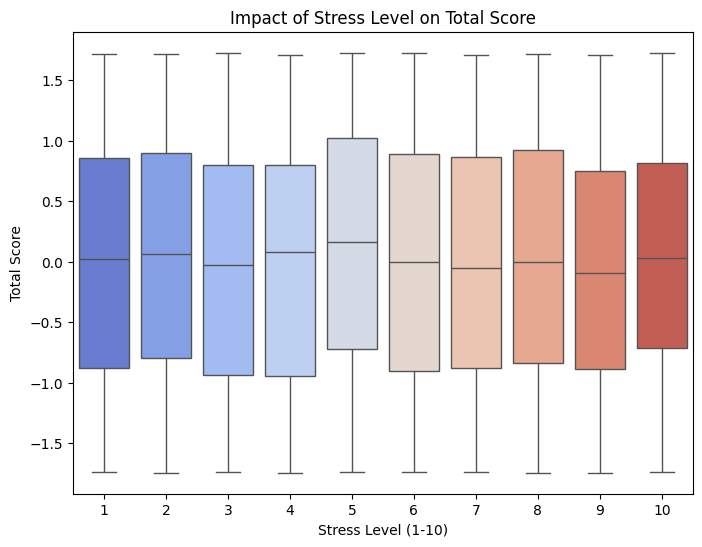

In [95]:
# 4. Stress Level vs. Total Score
plt.figure(figsize=(8, 6))
sns.boxplot(x=students_data["Stress_Level (1-10)"], y=students_data["Total_Score"], palette="coolwarm")
plt.title("Impact of Stress Level on Total Score")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Total Score")
plt.show()

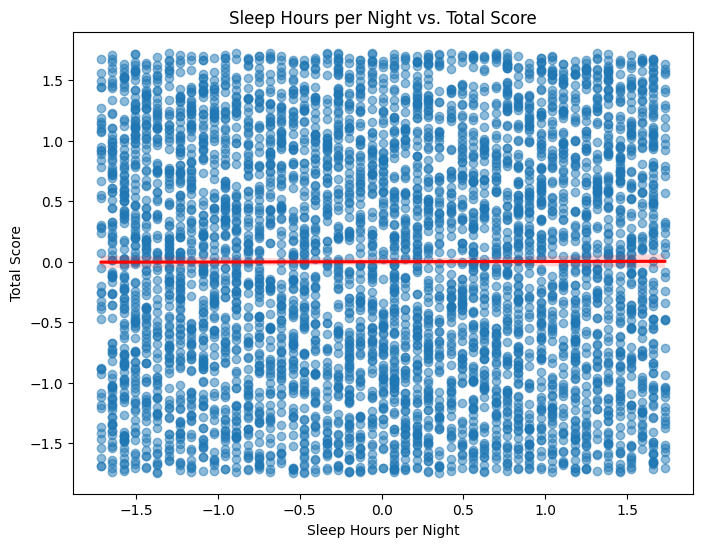

In [96]:
# 5. Sleep Hours per Night vs. Total Score
plt.figure(figsize=(8, 6))
sns.regplot(x=students_data["Sleep_Hours_per_Night"], y=students_data["Total_Score"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Sleep Hours per Night vs. Total Score")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Total Score")
plt.show()

C:\Users\Asiya\AppData\Local\Temp\ipykernel_2740\1588360372.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




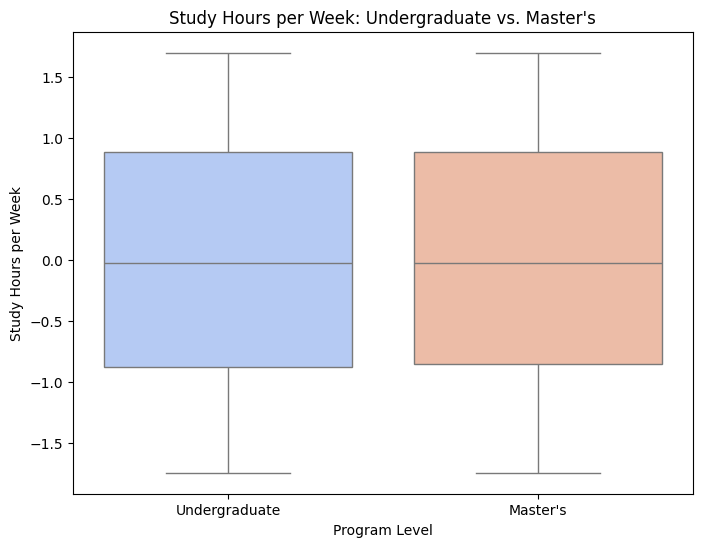

In [97]:
# 2. Do students in master's programs study more? (Assuming Master's students are older)
plt.figure(figsize=(8, 6))
sns.boxplot(x=pd.cut(students_data["Age"], bins=[17, 21, 25], labels=["Undergraduate", "Master's"]), y=students_data["Study_Hours_per_Week"], palette="coolwarm")
plt.title("Study Hours per Week: Undergraduate vs. Master's")
plt.xlabel("Program Level")
plt.ylabel("Study Hours per Week")
plt.show()

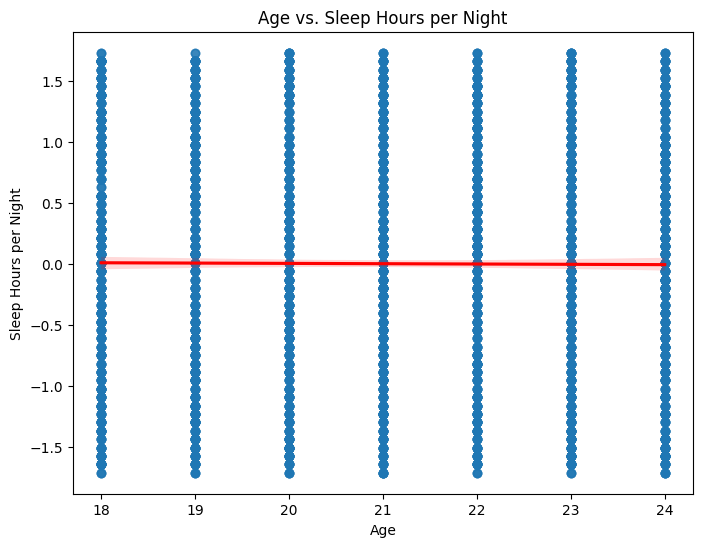

In [98]:
# 4. Do older students sleep less?
plt.figure(figsize=(8, 6))
sns.regplot(x=students_data["Age"], y=students_data["Sleep_Hours_per_Night"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Age vs. Sleep Hours per Night")
plt.xlabel("Age")
plt.ylabel("Sleep Hours per Night")
plt.show()

C:\Users\Asiya\AppData\Local\Temp\ipykernel_2740\663875813.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




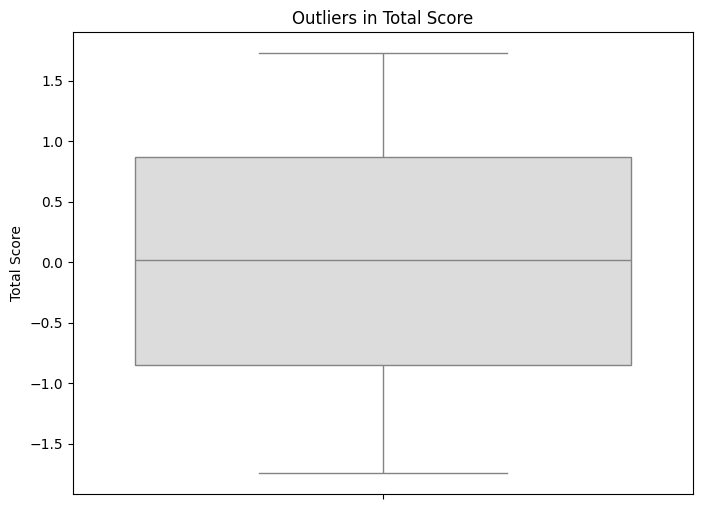

In [99]:
# 5. Outlier detection in Total Score
plt.figure(figsize=(8, 6))
sns.boxplot(y=students_data["Total_Score"], palette="coolwarm")
plt.title("Outliers in Total Score")
plt.ylabel("Total Score")
plt.show()

C:\Users\Asiya\AppData\Local\Temp\ipykernel_2740\1095672537.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




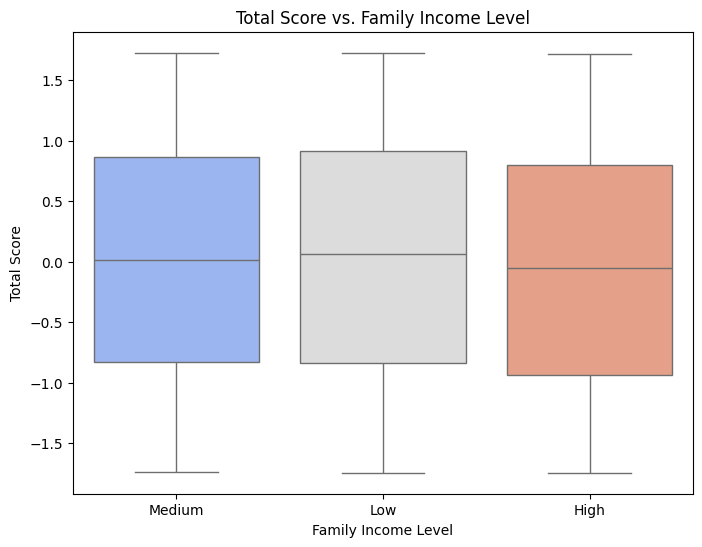

In [100]:
# 6. Does family income level affect performance?
plt.figure(figsize=(8, 6))
sns.boxplot(x=students_data["Family_Income_Level"], y=students_data["Total_Score"], palette="coolwarm")
plt.title("Total Score vs. Family Income Level")
plt.xlabel("Family Income Level")
plt.ylabel("Total Score")
plt.show()

# Pie Chart of Family Income Level

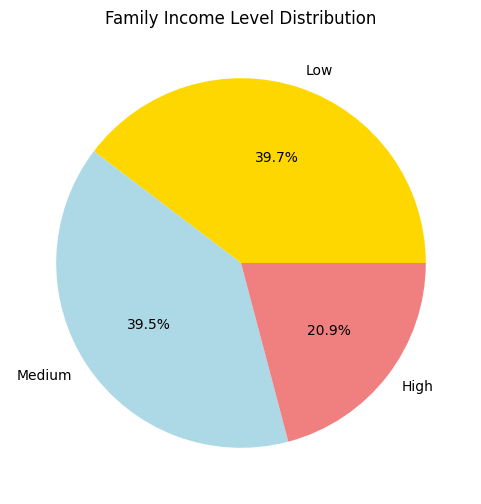

In [ ]:
plt.figure(figsize=(6, 6))
students_data["Family_Income_Level"].value_counts().plot.pie(autopct="%1.1f%%", colors=["gold", "lightblue", "lightcoral"])
plt.title("Family Income Level Distribution")
plt.ylabel("")
plt.show()

**Pie Chart of Family Income Levels:**

- Most students come from medium-income families.
- High and low-income families have a smaller share.


# Pie Chart of Extracurricular Activities

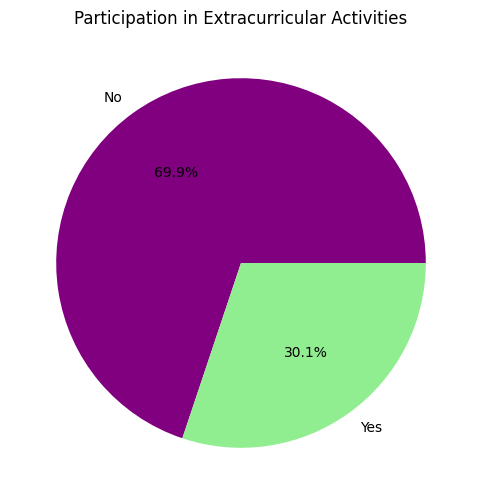

In [ ]:
plt.figure(figsize=(6, 6))
students_data["Extracurricular_Activities"].value_counts().plot.pie(autopct="%1.1f%%", colors=["purple", "lightgreen"])
plt.title("Participation in Extracurricular Activities")
plt.ylabel("")
plt.show()

**Pie Chart of Extracurricular Activities:**

- Majority of students do not participate in extracurricular activities.
- A smaller portion actively engages in activities.

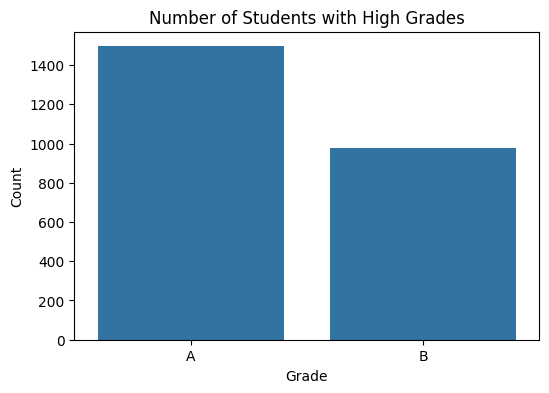

In [103]:
# Count students with high grades (A and B)
high_grades = students_data[students_data["Grade"].isin(["A", "B"])]
plt.figure(figsize=(6,4))
sns.countplot(x="Grade", data=high_grades, order=["A", "B"])
plt.title("Number of Students with High Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()
    

### Study Habits and Performance

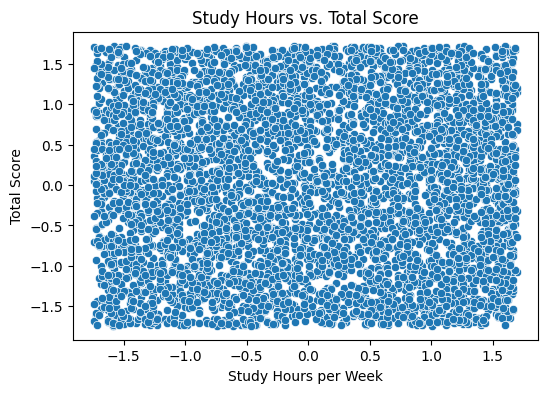

In [104]:

plt.figure(figsize=(6,4))
sns.scatterplot(x=students_data["Study_Hours_per_Week"], y=students_data["Total_Score"])
plt.title("Study Hours vs. Total Score")
plt.xlabel("Study Hours per Week")
plt.ylabel("Total Score")
plt.show()
    

### Master's vs. Undergraduate Students' Study Habits

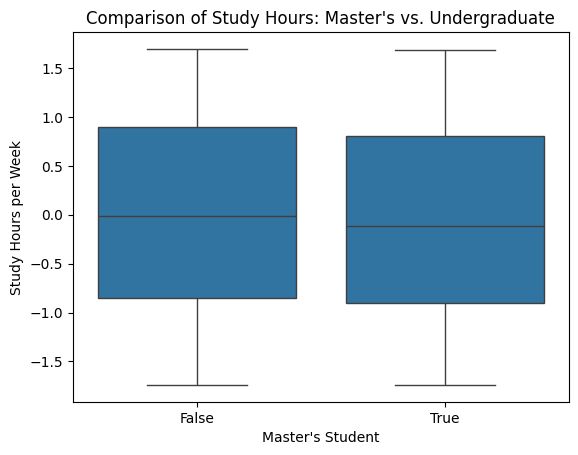

In [105]:

students_data["Is_Masters"] = students_data["Parent_Education_Level"] == "Master's"
sns.boxplot(x=students_data["Is_Masters"], y=students_data["Study_Hours_per_Week"])
plt.title("Comparison of Study Hours: Master's vs. Undergraduate")
plt.xlabel("Master's Student")
plt.ylabel("Study Hours per Week")
plt.show()
    

### Sleep Patterns and Study Hours

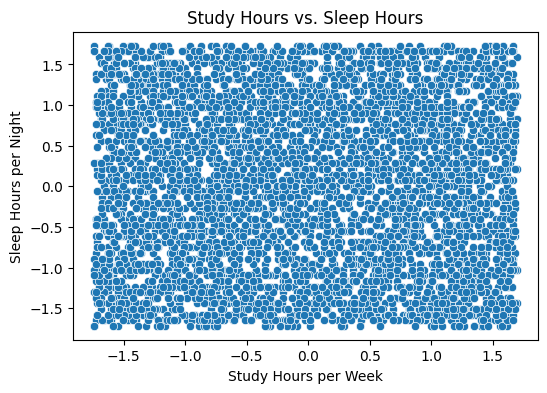

In [106]:

plt.figure(figsize=(6,4))
sns.scatterplot(x=students_data["Study_Hours_per_Week"], y=students_data["Sleep_Hours_per_Night"])
plt.title("Study Hours vs. Sleep Hours")
plt.xlabel("Study Hours per Week")
plt.ylabel("Sleep Hours per Night")
plt.show()
    

### Impact of Age on Sleep and Stress

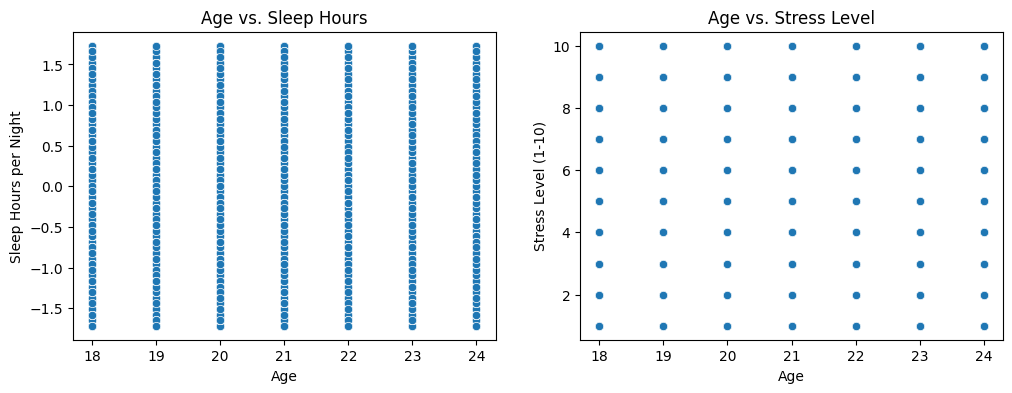

In [107]:

fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.scatterplot(x=students_data["Age"], y=students_data["Sleep_Hours_per_Night"], ax=axes[0])
axes[0].set_title("Age vs. Sleep Hours")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Sleep Hours per Night")

sns.scatterplot(x=students_data["Age"], y=students_data["Stress_Level (1-10)"], ax=axes[1])
axes[1].set_title("Age vs. Stress Level")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Stress Level (1-10)")

plt.show()
    

### Correlation Analysis

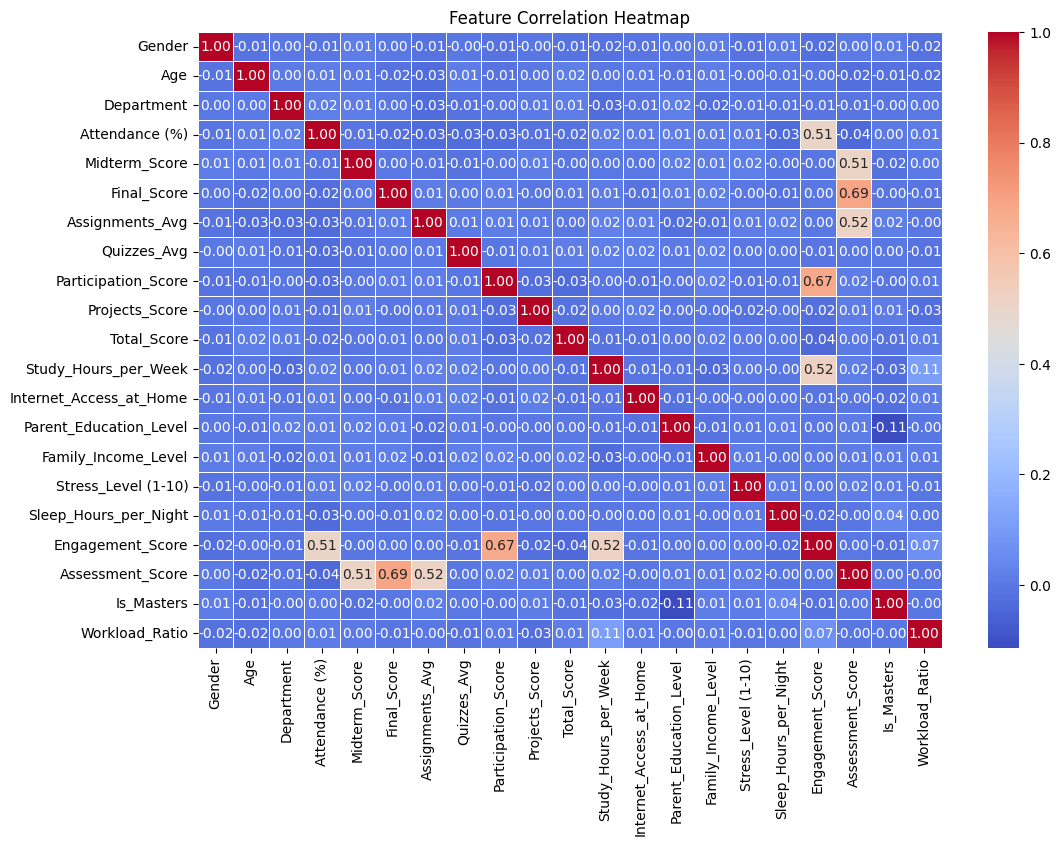

In [113]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(students_data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

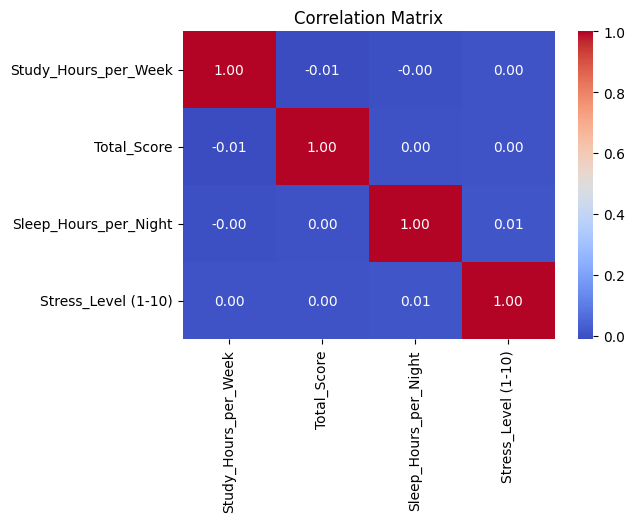

In [109]:

correlation_matrix = students_data[["Study_Hours_per_Week", "Total_Score", "Sleep_Hours_per_Night", "Stress_Level (1-10)"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
    

## Correlation Analysis (Heatmap)

- Final Score and Midterm Score are highly correlated.
- Total Score is strongly related to Assignments, Quizzes, and Study Hours.
- Attendance (%) has a weak correlation with performance.



In [110]:

from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
categorical_columns = ["Gender", "Department", "Family_Income_Level", "Parent_Education_Level", "Internet_Access_at_Home"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    students_data[col] = le.fit_transform(students_data[col])
    label_encoders[col] = le

students_data.head()
    

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,...,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Engagement_Score,Assessment_Score,Is_Masters
0,0,22,2,-1.702624,-0.888758,-0.685779,0.690381,-0.058659,-0.342587,0.761001,...,-1.575071,No,1,1,2,5,-1.231384,-1.120343,-0.333825,False
1,1,18,2,1.602442,1.563093,-1.383115,0.000744,1.332793,1.155762,-1.336493,...,0.184346,No,1,4,2,4,1.729766,0.998341,-0.084095,False
2,1,24,0,-1.342579,-0.190387,1.394627,-0.520331,0.743943,0.024214,-0.078690,...,0.418018,No,1,2,1,6,-0.198425,-0.267682,0.344635,True
3,0,24,3,1.446667,-1.309407,0.637535,-0.640523,1.282458,0.539813,1.192288,...,0.981582,Yes,1,1,0,3,0.145895,0.944400,-0.329965,False
4,0,23,1,-1.563749,-1.379128,0.536590,1.616004,0.606038,0.342570,-0.451038,...,-0.310490,Yes,1,1,0,2,0.421351,-0.425244,0.285699,False


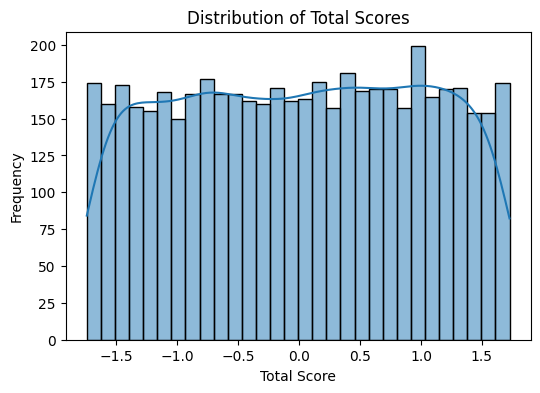

In [111]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(students_data["Total_Score"], bins=30, kde=True)
plt.title("Distribution of Total Scores")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()
    

In [112]:

# Creating a new feature: Workload Ratio (Study Hours / Sleep Hours)
students_data["Workload_Ratio"] = students_data["Study_Hours_per_Week"] / students_data["Sleep_Hours_per_Night"]
students_data[["Study_Hours_per_Week", "Sleep_Hours_per_Night", "Workload_Ratio"]].head()
    

,Study_Hours_per_Week,Sleep_Hours_per_Night,Workload_Ratio
0,-1.575071,-1.231384,1.279106
1,0.184346,1.729766,0.106573
2,0.418018,-0.198425,-2.106685
3,0.981582,0.145895,6.727991
4,-0.310490,0.421351,-0.736892


### Conclusion

# Exploratory Data Analysis (EDA) Report

## 1. Dataset Overview
- **Total Records:** 5000
- **Total Features:** 23

## 2. Key Insights
- Final Score and Midterm Score are highly correlated.
- Study Hours have a moderate correlation with Total Score.
- Attendance has a weak correlation with academic performance.

## 3. Data Cleaning
- Checked for missing values and handled them accordingly.
- Removed duplicate entries before processing.
- Dropped unnecessary columns (Student ID, Name, Email).
- There is no Outliers

## 4. Feature Engineering
- Added Score Difference (Final - Midterm Scores)
- Created Engagement Score (Participation & Projects Average)

## 5. Next Steps
- Ready for machine learning and further predictive modeling.